In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

<Axes: >

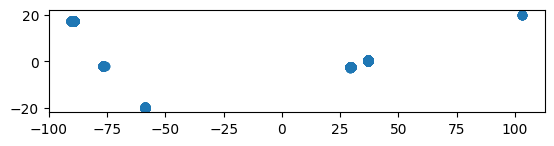

In [2]:
df = pd.read_csv("../data/iwildcam_2022_crops_bioclip_inference_logits_v3.csv")
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)
gdf.plot()

In [3]:
# The following bandwidth can be automatically detected using

data = df[["latitude", "longitude"]].to_numpy()
X = data[np.isfinite(data).all(axis=1)]

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(labels.shape, np.isfinite(data).all(axis=1).sum())
df["region_label"] = None
df.loc[np.where(np.isfinite(data).all(axis=1))[0], "region_label"] = labels

print("number of estimated clusters : %d" % n_clusters_)

(138127,) 138127
number of estimated clusters : 6


In [18]:
df_out = df.groupby("location")[["region_label", "latitude", "longitude"]].median()
df_out["region_label"] = df_out["region_label"].astype(pd.Int32Dtype())
df_out.to_csv("../data/iwildcam_2022_region_labels.csv")

/data/vision/beery/scratch/timm/micromamba/envs/zorrilla/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/data/vision/beery/scratch/timm/micromamba/envs/zorrilla/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/data/vision/beery/scratch/timm/micromamba/envs/zorrilla/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/data/vision/beery/scratch/timm/micromamba/envs/zorrilla/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/data/vision/beery/scratch/timm/micromamba/envs/zorrilla/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  

In [12]:
df_out = df_out.reset_index()

In [14]:
df_out

,location,region_label,latitude,longitude
0,0,2,-2.626241,29.350557
1,1,1,0.310089,36.878811
2,3,0,17.354530,-89.330771
3,8,0,17.424201,-89.420480
4,9,4,-1.854243,-76.843031
...,...,...,...,...
318,543,<NA>,NaN,NaN
319,545,<NA>,NaN,NaN
320,547,0,17.445675,-89.354243
321,550,<NA>,NaN,NaN


[]

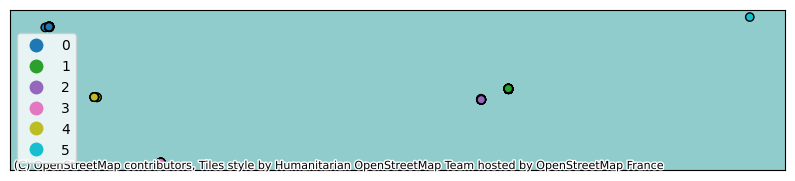

In [17]:
gdf_out = gpd.GeoDataFrame(
    df_out, geometry=gpd.points_from_xy(df_out.longitude, df_out.latitude), crs="EPSG:4326"
)
ax = gdf_out.plot(figsize=(10, 10), column="region_label", categorical=True, legend=True, edgecolor="k")
cx.add_basemap(ax)
ax.set_xticks([], [])
ax.set_yticks([], [])